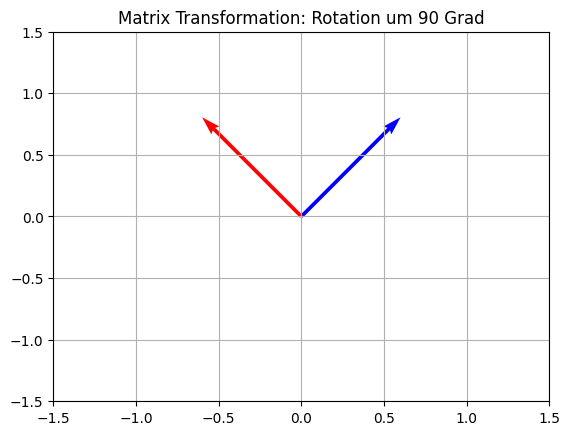

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Definition von Matrix und Vektor
theta = np.radians(90)
R = np.array([[np.cos(theta), -np.sin(theta)], 
              [np.sin(theta),  np.cos(theta)]])
v = np.array([1, 1])

# 2. Transformation
v_transformed = R @ v  # Nutze den @ Operator für Matrixmultiplikation

# 3. Visualisierung
origin = np.array([[0, 0], [0, 0]]) # Ursprung für die Pfeile
V = np.array([v, v_transformed])

plt.quiver(*origin, V[:,0], V[:,1], color=['b', 'r'], scale=5)
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.grid()
plt.title("Matrix Transformation: Rotation um 90 Grad")
plt.show()

Basis-Vektor v: [1 0]
Ergebnis R @ S (Erst S, dann R): [1.2246468e-16 2.0000000e+00]
Ergebnis S @ R (Erst R, dann S): [1.2246468e-16 1.0000000e+00]


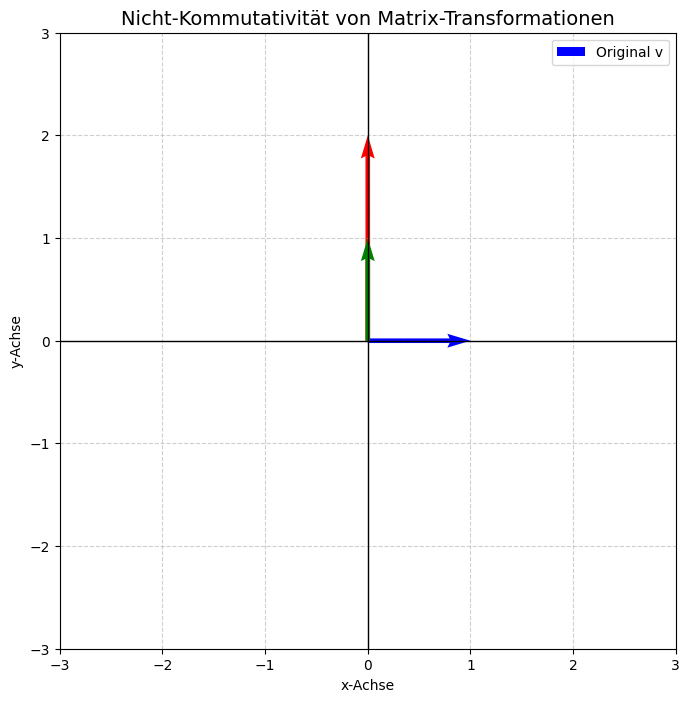

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Tuple

def plot_vectors(vectors: list, colors: list, labels: list, title: str):
    """
    Hilfsfunktion zur professionellen Visualisierung von Vektoren.
    """
    plt.figure(figsize=(8, 8))
    
    # Ursprung für alle Vektoren (0,0)
    origin = np.zeros((2, len(vectors))) 
    
    V = np.array(vectors)
    
    # Quiver-Plot: Visualisierung der Vektorpfeile
    q = plt.quiver(origin[0, :], origin[1, :], V[:, 0], V[:, 1], 
                   color=colors, angles='xy', scale_units='xy', scale=1, label=labels)
    
    # Legende hinzufügen
    plt.legend(labels)
    
    # Styling
    plt.xlim(-3, 3)
    plt.ylim(-3, 3)
    plt.axhline(0, color='black', lw=1)
    plt.axvline(0, color='black', lw=1)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.title(title, fontsize=14)
    plt.xlabel("x-Achse")
    plt.ylabel("y-Achse")
    plt.gca().set_aspect('equal') # Wichtig für korrekte Winkel bei Rotationen
    plt.show()

# --- 1. Definition der Transformationen ---
# Skalierung: Streckung in x um Faktor 2
S = np.array([[2, 0], 
              [0, 1]])

# Rotation: 90 Grad gegen den Uhrzeigersinn
theta = np.radians(90)
R = np.array([[np.cos(theta), -np.sin(theta)], 
              [np.sin(theta),  np.cos(theta)]])

# --- 2. Kompositionen berechnen ---
# Erst skalieren, dann rotieren: y = R(S(v))
C1 = R @ S 
# Erst rotieren, dann skalieren: y = S(R(v))
C2 = S @ R 

# --- 3. Testvektor transformieren ---
v = np.array([1, 0])
y1 = C1 @ v
y2 = C2 @ v

# --- 4. Ausgabe & Visualisierung ---
print(f"Basis-Vektor v: {v}")
print(f"Ergebnis R @ S (Erst S, dann R): {y1}")
print(f"Ergebnis S @ R (Erst R, dann S): {y2}")

plot_vectors(
    vectors=[v, y1, y2],
    colors=['blue', 'red', 'green'],
    labels=['Original v', 'R @ S (Scale then Rotate)', 'S @ R (Rotate then Scale)'],
    title="Nicht-Kommutativität von Matrix-Transformationen"
)

In [9]:
import numpy as np
import matplotlib.pyplot as plt

S = np.array([[2, 0], [0, 1]])
R = np.array([[0, -1], [1, 0]])

# 1. Determinanten berechnen
det_S = np.linalg.det(S)
det_R = np.linalg.det(R)

print(f"Determinante S: {det_S:.2f}") # Sollte 2.0 sein
print(f"Determinante R: {det_R:.2f}") # Sollte 1.0 sein

# 2. Inverse berechnen
S_inv = np.linalg.inv(S)
R_inv = np.linalg.inv(R)

# 3. Test: R mal R_inv muss die Einheitsmatrix ergeben
identity_test_R = R @ R_inv
identity_test_S = S @ S_inv
print("R @ R_inv:\n", np.round(identity_test_R, 2))
print("S @ S_inv:\n", np.round(identity_test_S, 2))

# 4. Anwendung: Vektor hin und zurück transformieren
v = np.array([1, 0])
v_rotated = R @ v
v_restored_rotated = R_inv @ v_rotated
v_streched = S @ v
v_restored_streched = S_inv @ v_streched

print(f"Original: {v}, Rotated: {v_rotated}, Restored (Rotated): {v_restored_rotated}")
print(f"Original: {v}, Streched: {v_streched}, Restored (Streched): {v_restored_streched}")

Determinante S: 2.00
Determinante R: 1.00
R @ R_inv:
 [[1. 0.]
 [0. 1.]]
S @ S_inv:
 [[1. 0.]
 [0. 1.]]
Original: [1 0], Rotated: [0 1], Restored (Rotated): [ 1. -0.]
Original: [1 0], Streched: [2 0], Restored (Streched): [1. 0.]
